##Considerations

This report aims to evaluate the performance of a series of performance analysis of Machine Learning (ML) load. This is considering the following variables, "TestId, Build, Optimised, Time (ms), PeakMemory (MB), Device CPUFrequency (MHz), Threads, MLNetwork."
I decided to focus on analysing those variables which are the result of the performance test. Specifically: Time (ms) and PeakMemory (MB).
I considered the other variables as test parameters: Build, Optimised, Device, CPUFrequency (MHz), Threads, MLNetwork.

Although there is no need to use statistical measures, I have decided to use them to a minimum. This in order to improve visualization.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!ls

Mounted at /content/drive
drive  sample_data


In [2]:
!ls ./drive/MyDrive/ARM_Tech_Assignment/Assignment_1

 Assignment1.txt
'Performance analysis of Machine Learning (ML) loads.ipynb'
 TestInfo.csv
 TestResults.pickle


In [ ]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt


def get_test_results_data():
    df = pickle.load(open('./drive/MyDrive/ARM_Tech_Assignment/Assignment_1/TestResults.pickle', 'rb'))
    return df


def get_test_info():
    df = pd.read_csv('./drive/MyDrive/ARM_Tech_Assignment/Assignment_1/TestInfo.csv')
    return df


def merge_test_results_info():
    test_results = get_test_results_data()
    test_info = get_test_info()
    df = test_results.merge(test_info, on='TestId')

    return df


def show_df_nice(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 1000):
        print(df)


# show df splitted by TestID
def show_df_nice_by_testid(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 1000):
        for testid, group in df.groupby('TestId'):
            print(f'TestId: {testid}')
            print(group)
            print('')


def analize_peak_memory_by_build(df):
    plt.rcParams['figure.figsize'] = [10, 10]
    df = df.groupby('Build').agg({'PeakMemory (MB)': ['min', 'max', 'mean']})
    df.plot.bar(y='PeakMemory (MB)')
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)) + ' MB'))
    plt.show()


def analize_peak_memory_by_optimized(df):
    plt.rcParams['figure.figsize'] = [10, 10]
    df = df.groupby('Optimised').agg({'PeakMemory (MB)': ['min', 'max', 'mean']})
    df.plot.bar(y='PeakMemory (MB)')
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)) + ' MB'))
    plt.show()


def analize_peak_memory_by_time(df):
    plt.rcParams['figure.figsize'] = [10, 10]
    df = df.groupby('Time (ms)').agg({'PeakMemory (MB)': ['min', 'max', 'mean']})
    df.plot.bar(y='PeakMemory (MB)')
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)) + ' MB'))
    plt.show()


def analize_peak_memory_by_device(df):
    plt.rcParams['figure.figsize'] = [10, 10]
    df = df.groupby('Device').agg({'PeakMemory (MB)': ['min', 'max', 'mean']})
    df.plot.bar(y='PeakMemory (MB)')
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)) + ' MB'))
    plt.show()


def analize_peak_memory_by_cpu_frequency(df):
    plt.rcParams['figure.figsize'] = [10, 10]
    df = df.groupby('CPUFrequency (MHz)').agg({'PeakMemory (MB)': ['min', 'max', 'mean']})
    df.plot.bar(y='PeakMemory (MB)')
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)) + ' MB'))
    plt.show()


def analize_peak_memory_by_threads(df):
    plt.rcParams['figure.figsize'] = [10, 10]
    df = df.groupby('Threads').agg({'PeakMemory (MB)': ['min', 'max', 'mean']})
    df.plot.bar(y='PeakMemory (MB)')
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)) + ' MB'))
    plt.show()


def analize_peak_memory_by_network(df):
    plt.rcParams['figure.figsize'] = [10, 10]
    df = df.groupby('MLNetwork').agg({'PeakMemory (MB)': ['min', 'max', 'mean']})
    df.plot.bar(y='PeakMemory (MB)')
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)) + ' MB'))
    plt.show()


def analize_peak_memory_by_network_and_device(df):
    plt.rcParams['figure.figsize'] = [10, 10]
    df = df.groupby(['MLNetwork', 'Device']).agg({'PeakMemory (MB)': ['min', 'max', 'mean']})
    df.plot.bar(y='PeakMemory (MB)')
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)) + ' MB'))
    plt.show()


def analize_time_by_build(df):
    plt.rcParams['figure.figsize'] = [10, 10]
    df = df.groupby('Build').agg({'Time (ms)': ['min', 'max', 'mean']})
    df.plot.bar(y='Time (ms)')
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)) + ' ms'))
    plt.show()

def analize_time_by_optimized(df):
    plt.rcParams['figure.figsize'] = [10, 10]
    df = df.groupby('Optimised').agg({'Time (ms)': ['min', 'max', 'mean']})
    df.plot.bar(y='Time (ms)')
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)) + ' ms'))
    plt.show()


def analize_time_by_peak_memory(df):
    plt.rcParams['figure.figsize'] = [10, 10]
    df = df.groupby('PeakMemory (MB)').agg({'Time (ms)': ['min', 'max', 'mean']})
    df.plot.bar(y='Time (ms)')
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)) + ' ms'))
    plt.show()

def analize_time_by_device(df):
    plt.rcParams['figure.figsize'] = [10, 10]
    df = df.groupby('Device').agg({'Time (ms)': ['min', 'max', 'mean']})
    df.plot.bar(y='Time (ms)')
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)) + ' ms'))
    plt.show()

def analize_time_by_gpu_frequency(df):
    plt.rcParams['figure.figsize'] = [10, 10]
    df = df.groupby('CPUFrequency (MHz)').agg({'Time (ms)': ['min', 'max', 'mean']})
    df.plot.bar(y='Time (ms)')
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)) + ' ms'))
    plt.show()

def analize_time_by_threads(df):
    plt.rcParams['figure.figsize'] = [10, 10]
    df = df.groupby('Threads').agg({'Time (ms)': ['min', 'max', 'mean']})
    df.plot.bar(y='Time (ms)')
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)) + ' ms'))
    plt.show()

def analize_time_by_network(df):
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.rcParams['figure.figsize'] = [10, 10]
    df = df.groupby('MLNetwork').agg({'Time (ms)': ['min', 'max', 'mean']})
    df.plot.bar(y='Time (ms)')
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)) + ' ms'))
    plt.show()


Load and merge test data and test results

In [ ]:
df = merge_test_results_info()
#show_df_nice(df)
df.iloc[0:10]

,TestId,Build,Optimised,Time (ms),PeakMemory (MB),Device,CPUFrequency (MHz),Threads,MLNetwork
0,33,10,N,125.0,307,Device_0,2000,2,AlexNet
1,43,10,Y,50.0,50,Device_0,1000,2,MobileNet
2,36,10,N,50.0,458,Device_0,2000,5,AlexNet
3,1,2,N,64.0,451,Device_0,1000,5,MobileNet
4,16,8,N,104.0,453,Device_0,1000,5,AlexNet
5,27,10,N,500.0,300,Device_0,1000,1,AlexNet
6,26,9,N,53.0,457,Device_0,2000,5,AlexNet
7,41,10,N,200.0,454,Device_1,1000,5,AlexNet
8,37,10,N,800.0,298,Device_1,1000,1,AlexNet
9,46,10,Y,20.0,86,Device_0,1000,5,MobileNet


## 1. *Peak* Memory analysis





#*1.1 By Build* 
From this graph, it seems that there are substantial changes in the latest build. This should be analysed to verify if it is working correctly.

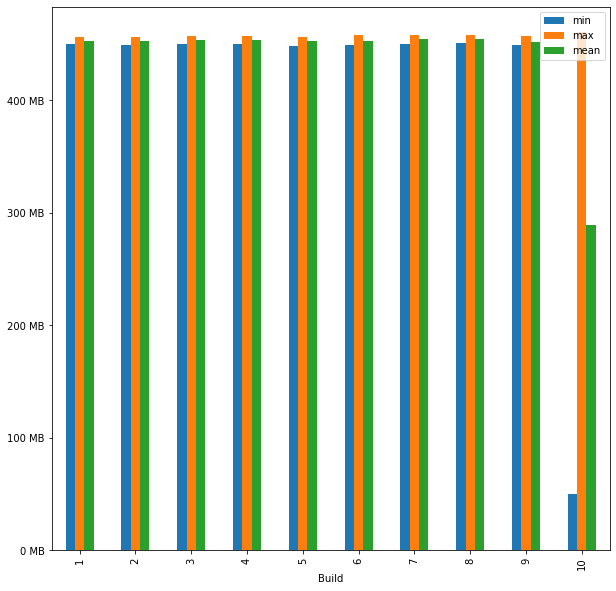

In [ ]:
analize_peak_memory_by_build(df)

#1.2 *By Optimise*

From this graph, it appears that the model optimisation has a great impact on peak memory. However, it is important to note that only MobileNet is optimised.
To confirm this result is important to remove this bias by removing AlexNet.

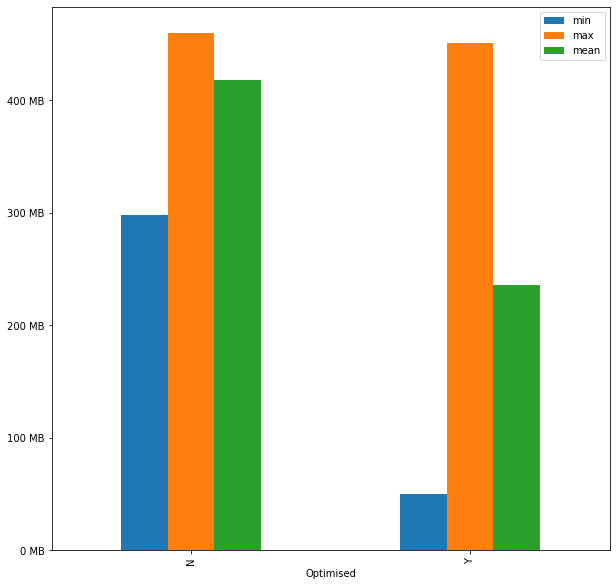

In [ ]:
analize_peak_memory_by_optimized(df)

#1.2.1 *By Optimise, MobileNet*

The previous analysis is confirmed, but it would be nice to do a test without the bias.

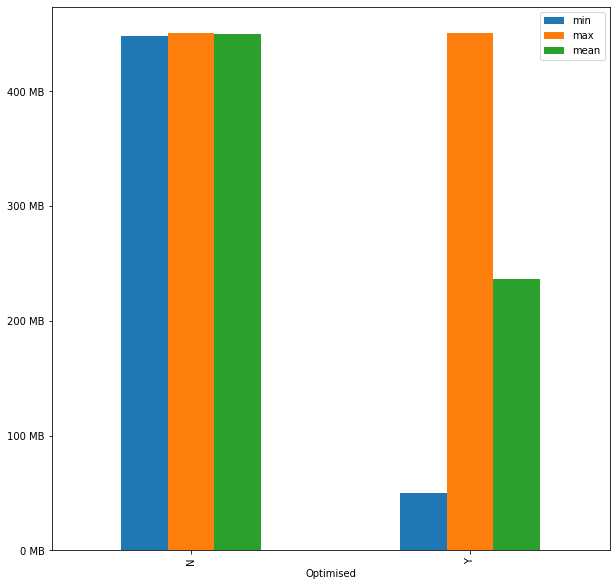

In [ ]:
analize_peak_memory_by_optimized(df[df['MLNetwork'] == 'MobileNet'])

#1.3 *By device*

This graph shows a similar behaviour to the previous analysis, however I think it is not relevant. In fact
there is no optimised Device_1 in the analysis.

In [ ]:
df.groupby(['Optimised', 'Device']).size()

Optimised  Device  
N          Device_0    33
           Device_1     5
Y          Device_0     9
dtype: int64

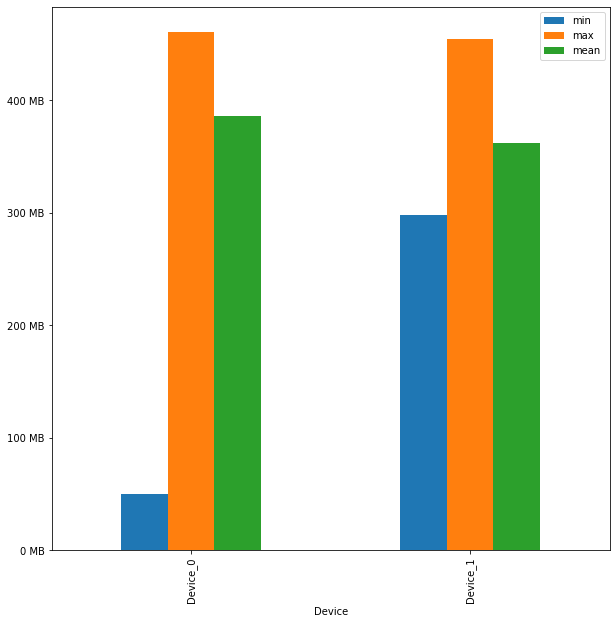

In [ ]:
analize_peak_memory_by_device(df)

1.3.1 By Device, Not Optimized

If we remove the bias, the graphs are comparable, so the statement on the previous graph seems correct.

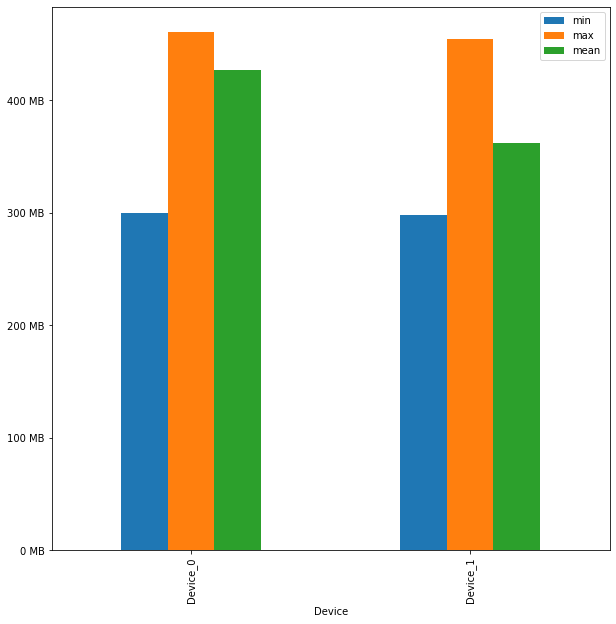

In [ ]:
analize_peak_memory_by_device(df[df['Optimised'] == 'N'])

# 1.4 *By threads*

On average, there is an increase in the mean memory peak as the number of threads increases. This result is in line with what was expected. However, the data from the first to the third thread are the same. It is necessary to analyze whether it is correct or whether there are some problems.

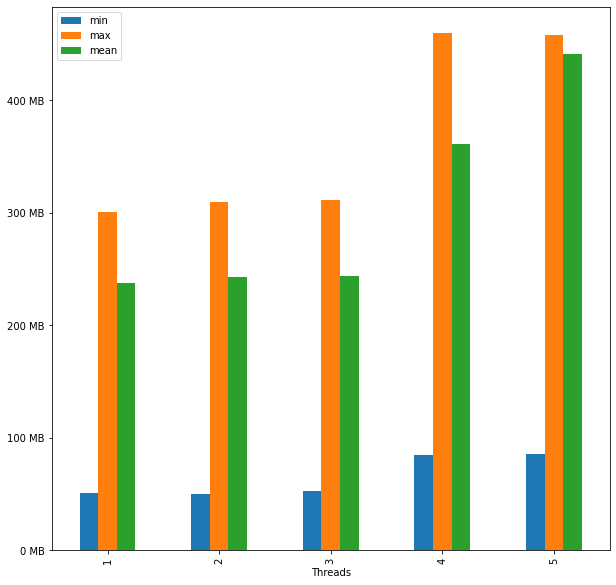

In [ ]:
analize_peak_memory_by_threads(df)

#1.5 *By cpu frequency*

Higher frequency corresponds to a higher peak in memory, and this is correct. However, max value is identical, probably the GPU during optimisation does not work at the maximum frequency, but the minimum frequency in the case of a device set to a maximum frequency of 2000MHZ is higher than that of 1000MHZ.

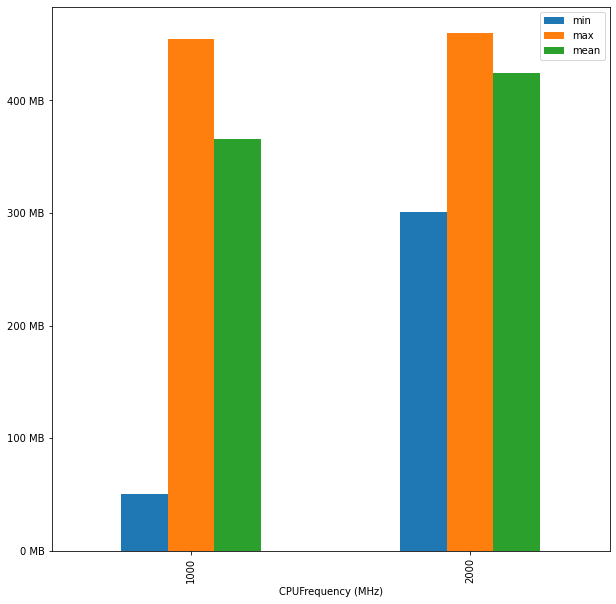

In [ ]:
analize_peak_memory_by_cpu_frequency(df)

#1.6 *By network*

Mobile networks are typically lighter, for many reasons. We therefore expect the average memory peak to be lower, which is confirmed in this graph. However, I would have expected a lower peak in the case of a mobile network. It would be interesting to investigate why.
Nevertheless, the usual bias of the optimised network must be taken into account to verify the correctness of this analysis.

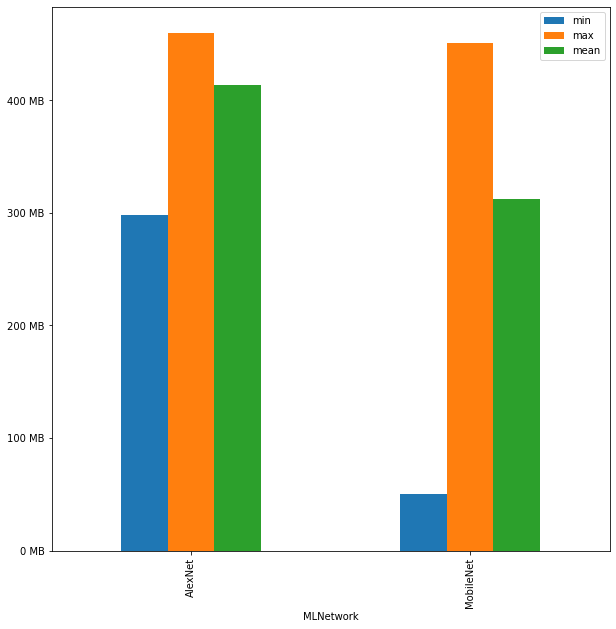

In [ ]:
analize_peak_memory_by_network(df)

#1.6.1 *By network, not optimised*

The optimization is very effective. Still, I would have expected MobileNet to be inferior to AlexNet in terms of peak memory and this should be investigated.

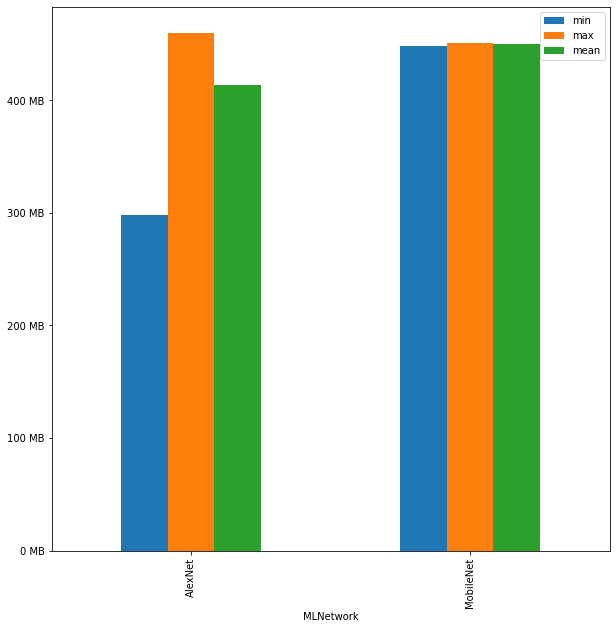

In [ ]:
analize_peak_memory_by_network(df[df['Optimised'] == 'N'])

#1.7 *By device*

Memory spikes depend mostly on the network and not on the device.

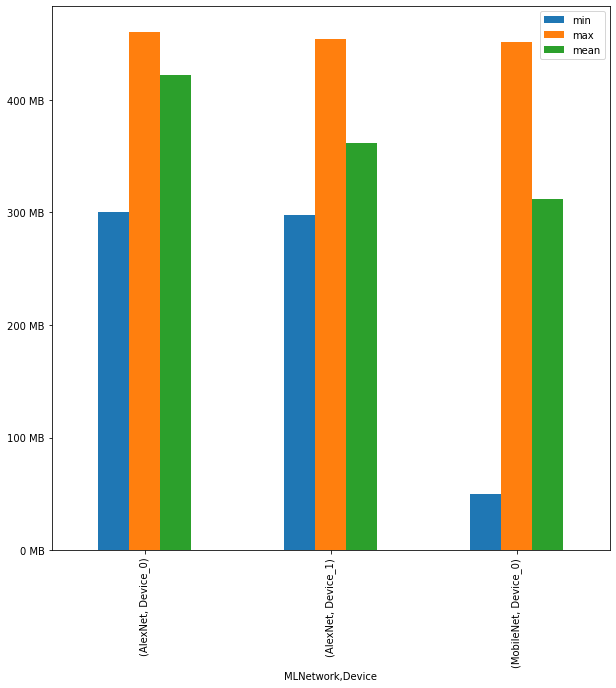

In [ ]:
analize_peak_memory_by_network_and_device(df)    

#1.8 *By execution time*


Memory peaks and execution time seem to be uncorrelated.

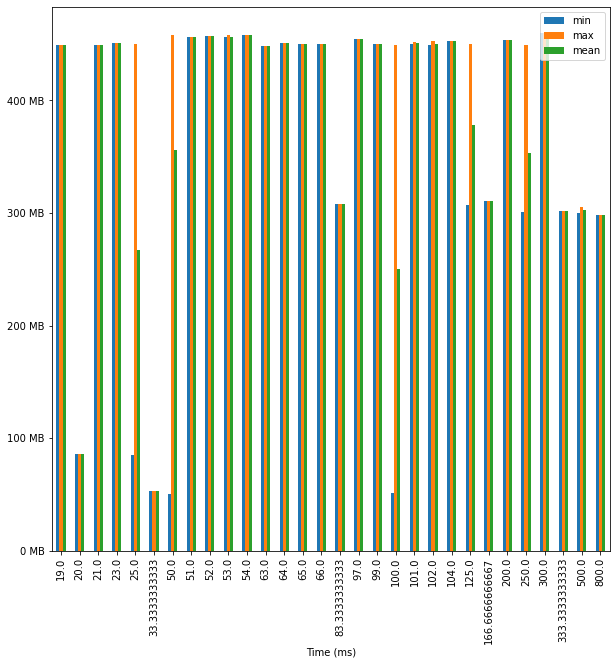

In [ ]:
analize_peak_memory_by_time(df)

##2. Time values analysis

# 2.1 *By build*

As written in 1.1 the latest build seems to be problematic and it should be investigated.

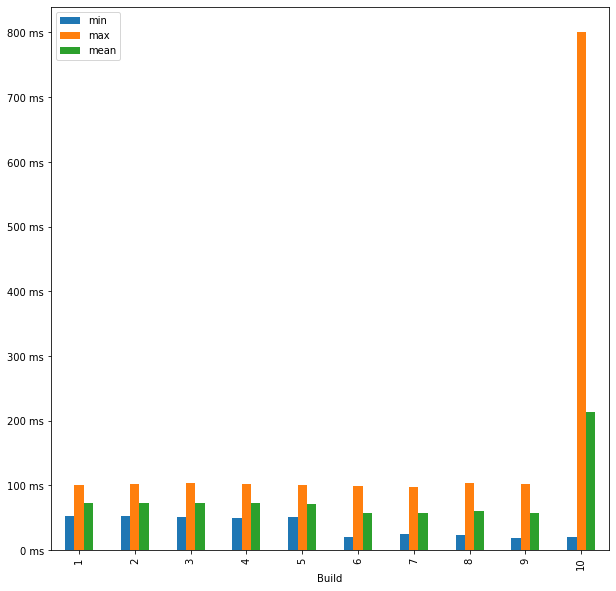

In [ ]:
analize_time_by_build(df)

# 2.2 *By optimized*

The result matches expectations.
However, I was forced to consider only MobileNet in this analysis as AlexNet does not have any optimized test.

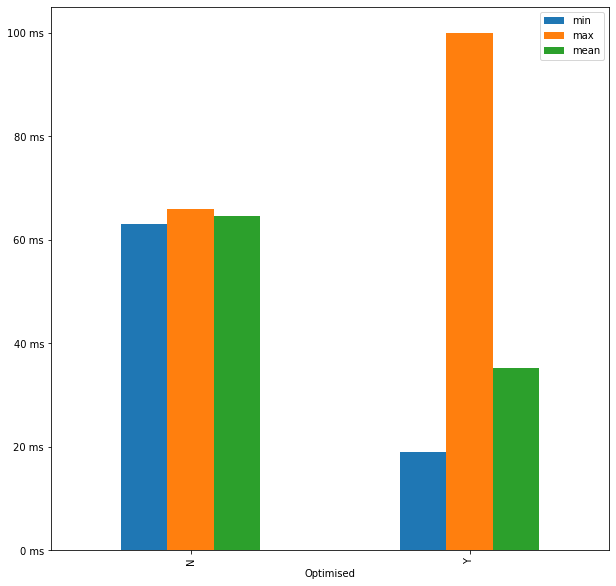

In [ ]:
analize_time_by_optimized(df[df['MLNetwork'] == 'MobileNet'])

# 2.3 *By peak memory*

The result is in line with expectations, there is no correlation.

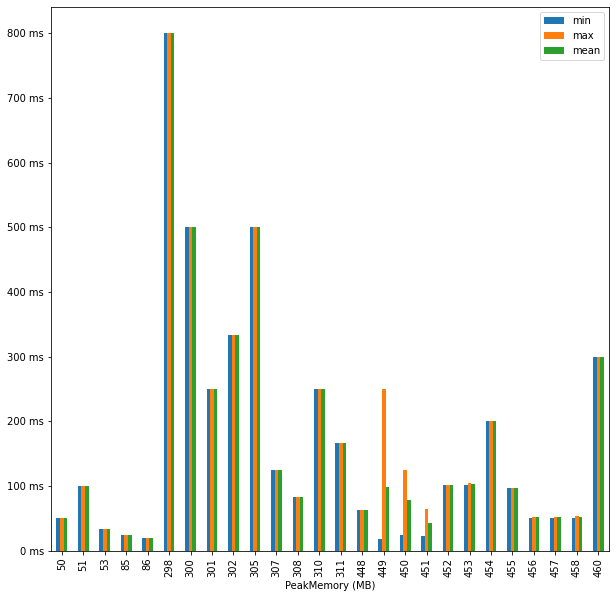

In [ ]:
analize_time_by_peak_memory(df)

#2.4 *By device*

This graph shows that "Device_0" performs better in terms of time values than "Device_1". However, this assumption needs to be confirmed by removing bias. In fact, Device_1 does not have any optimised test case.


In [ ]:
df.groupby(['Optimised', 'Device']).size()

Optimised  Device  
N          Device_0    33
           Device_1     5
Y          Device_0     9
dtype: int64

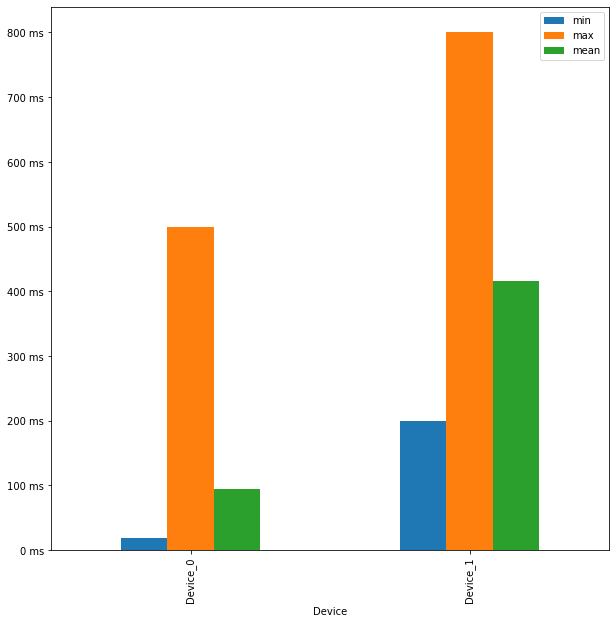

In [ ]:
analize_time_by_device(df)

#2.4.1 By device, not optimized

This graph, consideres only not optimised devices. This has been done in order to remove bias. The results remained surprisingly similar, which means that in this case, whether the network is optimised or not has no effect on time. Furthermore, this graph shows that "Device_0" performs better in terms of time values than "Device_1".

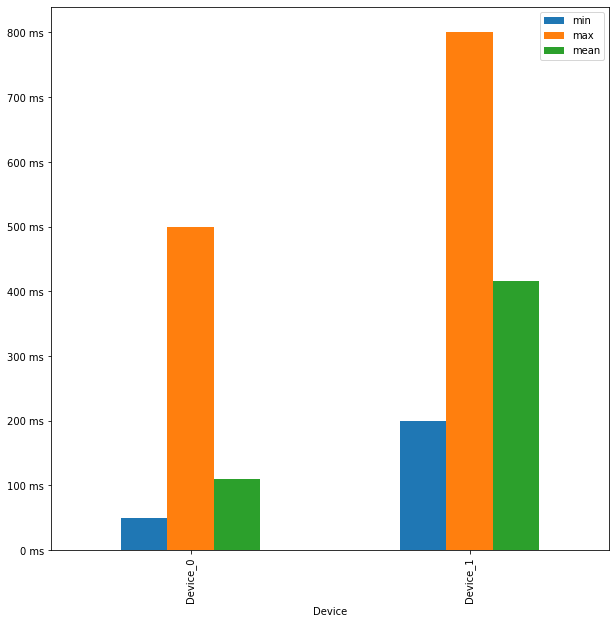

In [ ]:
analize_time_by_device(df[df['Optimised'] == 'N'])

#2.5 *By Gpu frequency*

Increasing the GPU frequency, decreases the execution time.  This is correct.

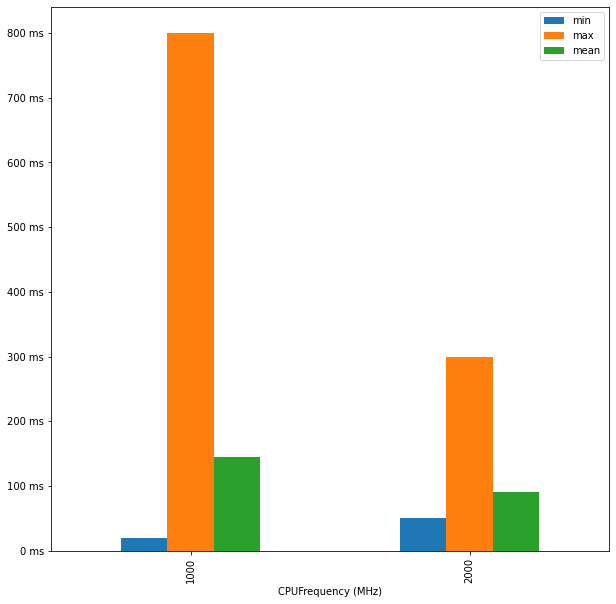

In [ ]:
analize_time_by_gpu_frequency(df)

#2.6 *By threads*

As the number of threads increases, the execution time decreases.  This is correct.

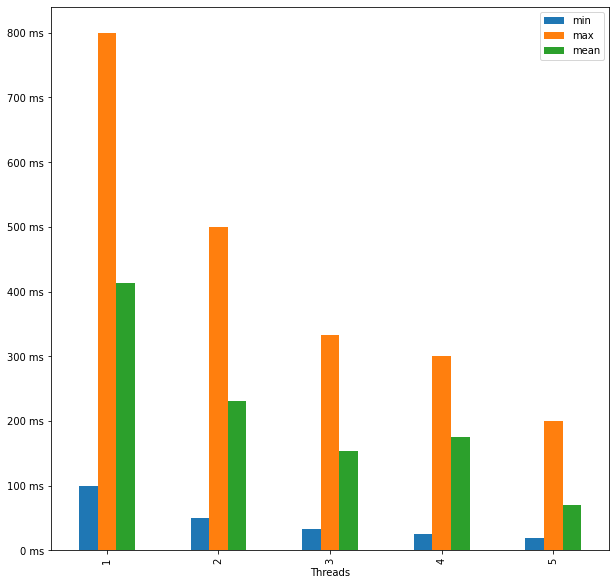

In [ ]:
analize_time_by_threads(df)

#2.7 By network

There are no instances of optimised AlexNet, so this graph has a bias. However, I would expect AlexNet to be greater in time execution. This is confirmed by the graph.

In [ ]:
df.groupby(['MLNetwork', 'Optimised']).size()

MLNetwork  Optimised
AlexNet    N            33
MobileNet  N             5
           Y             9
dtype: int64

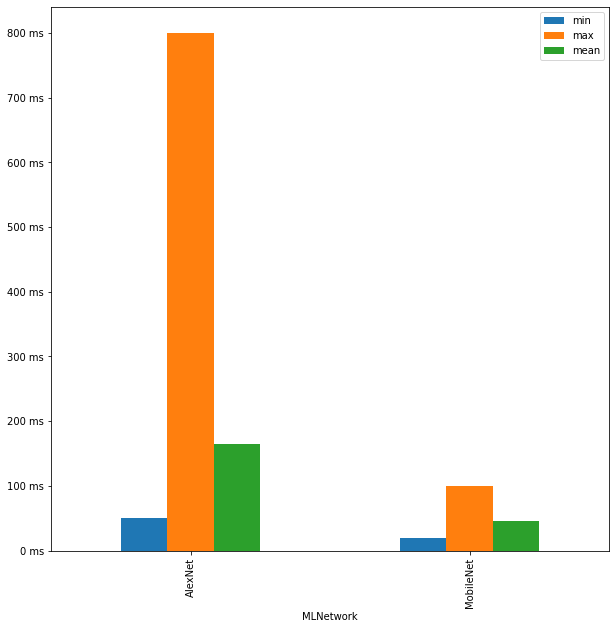

In [ ]:
analize_time_by_network(df)

#2.7.1 By non optimized network

If we select only the non-optimised networks in this case, we find that there is not much difference from the previous graph. This confirms that AlexNet is a heavier network than MobileNet, and it requires more time in order to be trained.

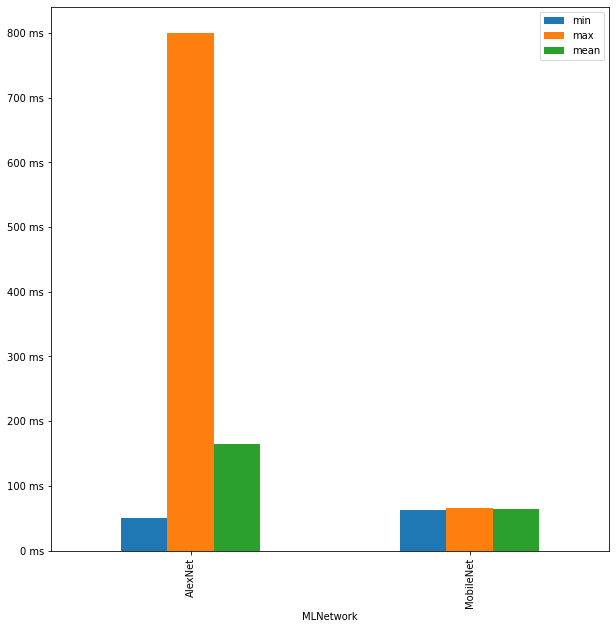

In [ ]:
analize_time_by_network(df[df['Optimised'] == 'N'])

#2.8 Considerations and Follow Up



1. Device 0 seems to behave better in both time values and memory peaks.
2. The last build should be checked: both time values and memory spikes has anomalous data.
3. This report has some problems. There is no data from  AlexNet and Device 1 in the optimized case. This makes the claims of the report biased. It would be necessary to have a test set that includes all the cases, this in order to make a reliable report.
4. It is necessary to analyze the memory peaks, considering 1 to 3 treads (as shown in "section 1.4"). By increasing threads, the memory peaks should raise in values, but remains the same.
5. Network optimisation has a great improving impact on memory peaks and on average also on time. Also it should be noted that in the unoptimised cases the min, max and mean values, seem to be very similar for both time execution and peak memory.
6. MobileNet should have lower memory peaks than AlexNet. However, in the report as shown in "Figure 1.6.1" these values are comparable. This should be checked.
7. Device in general does not impact memory spikes. This is dependent on other factors, such as the network or whether it is optimized or not.
8. AlexNet is more time-consuming than MobileNet. This is an expected result, being a more complex network.